# **Análise para testes de ações usando série temporal**

In [29]:
install.packages('rsample')
install.packages('forecast')
install.packages('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rsample)
library(forecast)
library(lmtest)


### **Lendo um dataset de testes**

In [18]:
stocks=read.csv('/content/GOOGL_2006-01-01_to_2018-01-01.csv')

dados=ts(stocks[,3])


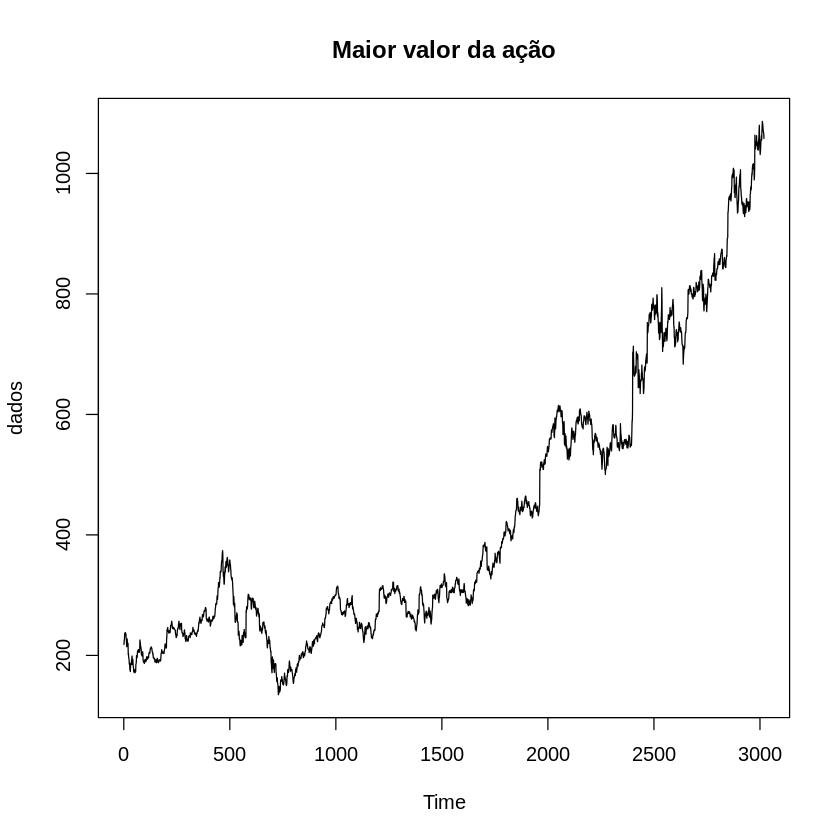

In [21]:
plot.ts(dados,main="Maior valor da ação") 

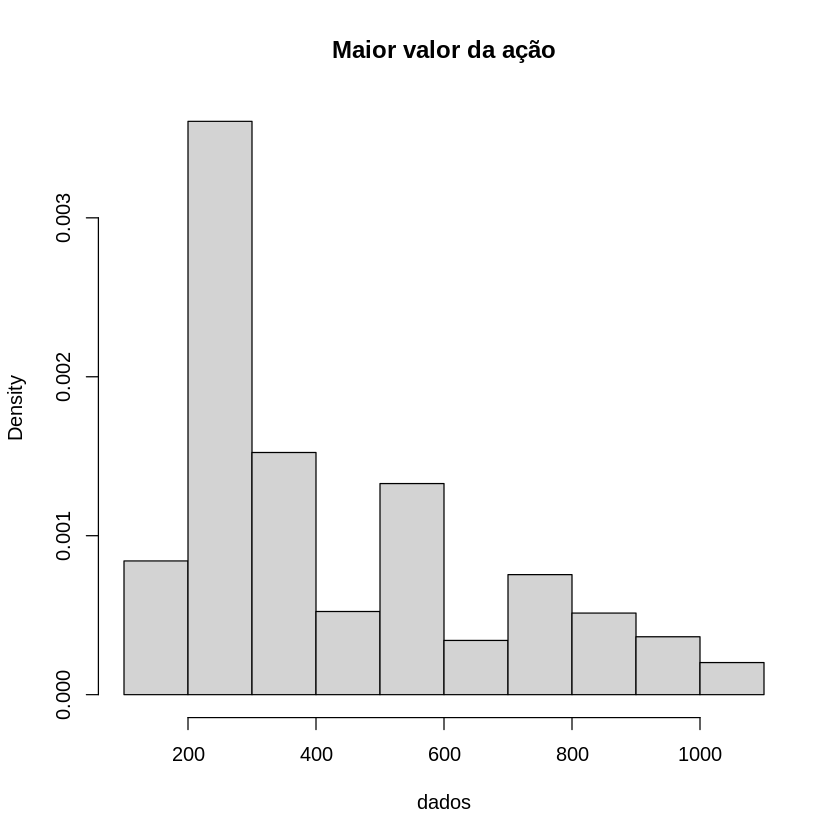

In [22]:
hist(dados,prob=T,main="Maior valor da ação")

In [23]:
summary(dados)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  134.8   250.2   312.8   431.8   576.0  1086.5 

In [24]:
var(dados)

[1] 56412.94

In [25]:
sd(dados)

[1] 237.5141

In [26]:
shapiro.test(dados)


	Shapiro-Wilk normality test

data:  dados
W = 0.86397, p-value < 2.2e-16


In [27]:
modelo1 = Arima(dados,order=c(2,0,0),seasonal=list(order=c(1,1,0),period=12),include.constant=F)
modelo1

Series: dados 
ARIMA(2,0,0)(1,1,0)[12] 

Coefficients:
         ar1      ar2     sar1
      1.1060  -0.1594  -0.4843
s.e.  0.0181   0.0180   0.0162

sigma^2 estimated as 59.41:  log likelihood=-10408.87
AIC=20825.75   AICc=20825.76   BIC=20849.78

In [31]:
coeftest(modelo1)


z test of coefficients:

      Estimate Std. Error  z value  Pr(>|z|)    
ar1   1.105964   0.018057  61.2485 < 2.2e-16 ***
ar2  -0.159389   0.018025  -8.8428 < 2.2e-16 ***
sar1 -0.484348   0.016159 -29.9738 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


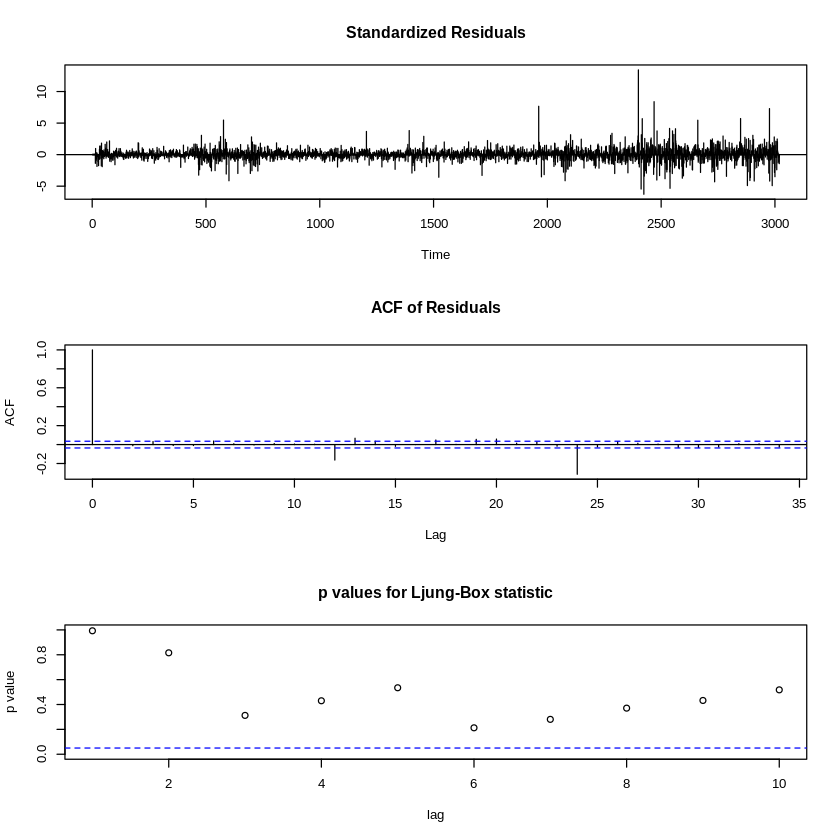

In [32]:
tsdiag(modelo1)

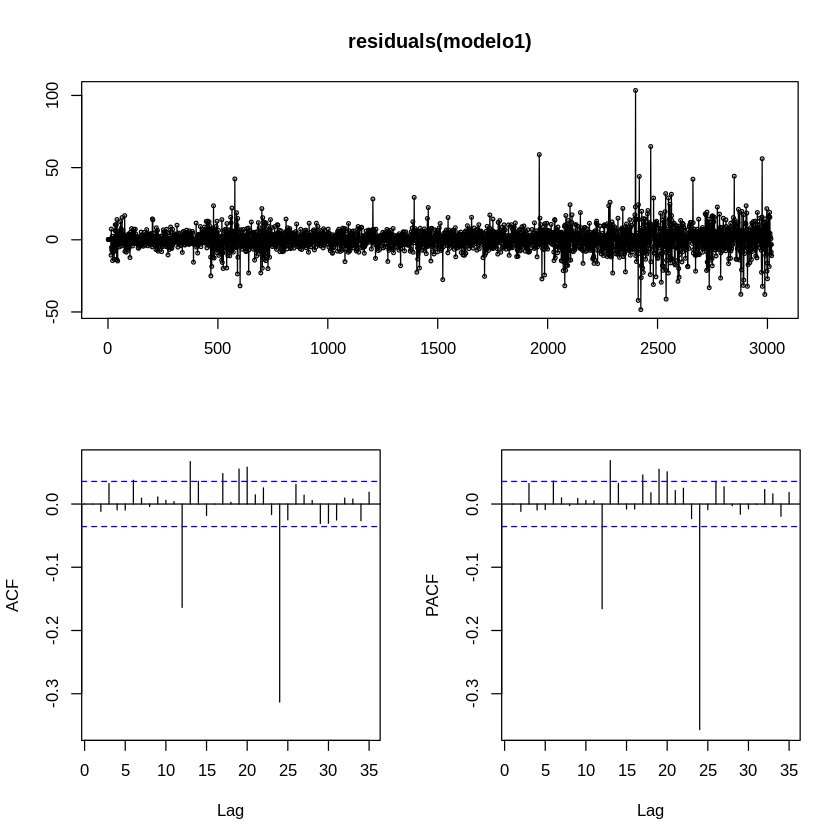

In [33]:
tsdisplay(residuals(modelo1))

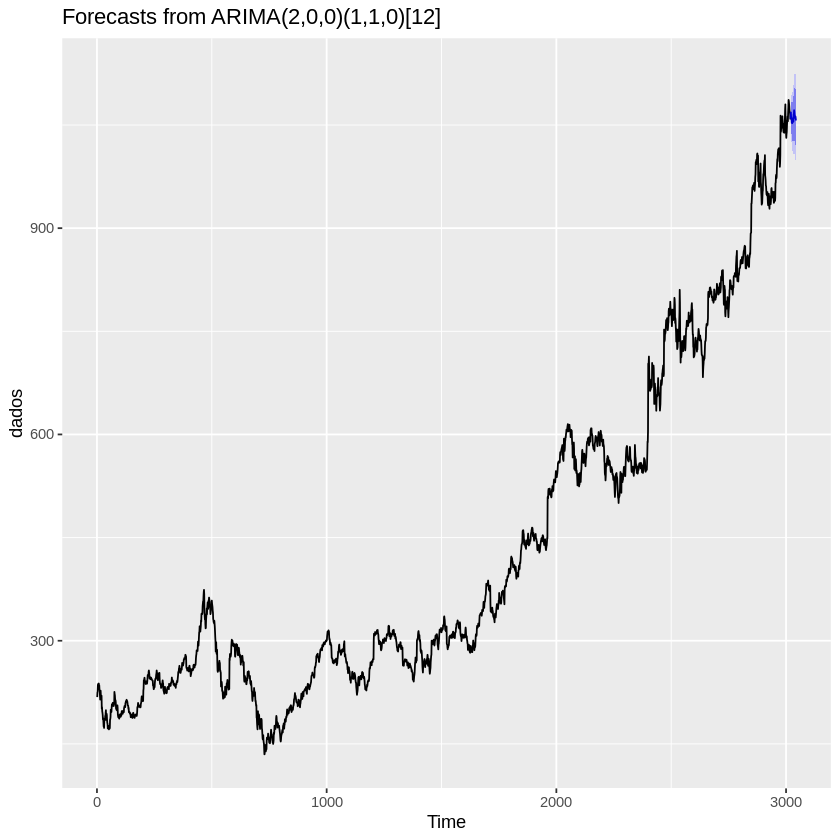

In [39]:
previsao = forecast(modelo1,h=24)

autoplot(previsao)
